In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from google.colab import files
torch.set_default_dtype(torch.float64)
plt.style.use('default')

In [1]:
uploaded = files.upload()
data = torch.from_numpy(np.genfromtxt('Penn-GPA-and-HS-Data.csv', delimiter=",", skip_header=1, dtype = float))

print(f"Number of students: {data.shape[0]}")
print(f"Number of variables: {data.shape[1]}")
print(f"\nExample student: \nHigh-school GPA: {data[0, 1]} \t SAT score: {data[0, 2]}\t Penn GPA: {data[0, 4]}\t")

NameError: name 'files' is not defined

In [ ]:
#Import data file and load

data = torch.from_numpy(
           np.genfromtxt (
               'Penn-GPA-and-HS-Data.csv',
               delimiter = ",",
               skip_header=1,
               dtype = float ) )

# The tensor "data" is a two dimensioanl table (a matrix). The first dimension
# (dimension 0) sweeps through students. The second dimension (dimension 1)
# sweeps through different pieces of data. We visualize this by printing the
# shape of the "data" tensor
print(f"\nNumber of students: {data.shape[0]}")
print(f"Number of variables: {data.shape[1]}\n")


Number of students: 600
Number of variables: 5



In [ ]:
#Data Processing
# To facilitate further processing we load high school GPA, SAT scores and
# Penn GPA in different vectors. Each of these is a vector containing data
# for the 600 students that are given to us.
high_school_gpa = data[:,1] # Column 1 of the data tensor.
sat_scores      = data[:,2] # Column 2 of the data tensor.
penn_gpa        = data[:,4] # Column 4 of the data tensor.
# : is basically a blank for the row, the second varaible indicates the column
# selection,

# We print data for some selected students
print(f"\nExample students\n")
print(f"HS GPA: {high_school_gpa[0]} \t SAT: {sat_scores[0]}\t Penn GPA: {penn_gpa[0]}")
print(f"HS GPA: {high_school_gpa[1]} \t SAT: {sat_scores[1]}\t Penn GPA: {penn_gpa[1]}")
print(f"HS GPA: {high_school_gpa[2]} \t SAT: {sat_scores[2]}\t Penn GPA: {penn_gpa[2]}")
print(f"HS GPA: {high_school_gpa[3]} \t SAT: {sat_scores[3]}\t Penn GPA: {penn_gpa[3]}")
print(f"HS GPA: {high_school_gpa[4]} \t SAT: {sat_scores[4]}\t Penn GPA: {penn_gpa[4]}")


Example students

HS GPA: 3.95 	 SAT: 1570.0	 Penn GPA: 3.9
HS GPA: 4.0 	 SAT: 1580.0	 Penn GPA: 3.97
HS GPA: 3.69 	 SAT: 1560.0	 Penn GPA: 3.57
HS GPA: 3.86 	 SAT: 1550.0	 Penn GPA: 3.7
HS GPA: 3.64 	 SAT: 1400.0	 Penn GPA: 3.7


In [ ]:
# Select the columns for each variable in the dataset
cols = [1, 2, 4]
data_cols = data[:, cols]

# Compute the mean and standard deviation of each variable.
means = torch.mean(data_cols, dim = 0)
stds = torch.std(data_cols, dim = 0)

# Substract the mean and divide by the std each variable.
data_norm = data.clone()
data_norm[:, cols] = (data_cols - means) / stds

# Save each column in a different variable
high_school_gpa_norm = data_norm[:,1]
sat_scores_norm = data_norm[:,2]
penn_gpa_norm = data_norm[:,4]

# Observe that the resulting variables have mean 0 and standard deviation 1.
print(f"Mean {torch.abs(torch.mean(high_school_gpa_norm)):.3f}")
print(f"Std {torch.std(high_school_gpa_norm):.3f}")

Mean 0.000
Std 1.000


In [ ]:
# Functions that compute MSE and its gradient wrt w.

def mean_squared_error(y, y_pred):
    """
    Computes mean squared error between two tensors
    Inputs:
        y: torch Tensor
            Target output

        y_pred: torch Tensor
            Predicted output

    Output:
        mse: torch Tensor
    """
    return torch.mean((y-y_pred)**2)

def mean_squared_error_gradient(y, x, w):
    """
    Computes the Gradient mean of squared error for a linear model,
    given its target output, input and parameters.
    Inputs:
        y: torch Tensor
            Target output

        x: torch Tensor
            Input data matrix

        w: torch Tensor
            Model parameters

    Output:
        gradient: torch Tensor
    """
    return -x.T@(y-x@w)/len(y)

In [ ]:
def train_gradient_descent(x, y, K = 150, epsilon = 0.1, w0 = torch.rand(2)-0.5):
    """
    Linar MMSE with Gradient Descent.
    Inputs:
        x: torch Tensor
            Input data matrix

        y: torch Tensor
            Target Values

        K: int
            Max. number of iterations.

        epsilon: float
            Learning rate.

    Output:
        w: torch Tensor
            Trained parameters

        mse_evolution: list
            Evolution of mean squared error during training.

        wdist_evolution: list
            Evolution of distance between w and the optimal, closed-form w.

    """

    # lists that store the evolution of MSE and ||w-w_star ||^2
    mse_evolution = []
    wdist_evolution = []

    # Initial w
    w = w0.clone()

    # Optimal parameter vector in closed form
    # Recall, the '@' operator is for matrix multiplication
    w_star = torch.linalg.inv(x.T @ x) @ x.T @ y
    wdist_evolution.append(torch.sum((w-w_star)**2))

    for k in range(K):

        # Compute predictions
        y_pred = x @ w

        # Compute error
        mse = mean_squared_error(y, y_pred)
        mse_evolution.append(mse)

        # Compute gradients
        grad = mean_squared_error_gradient(y, x, w)

        # Update parameters
        w -= epsilon*grad
        wdist = torch.sum((w-w_star)**2)
        wdist_evolution.append(wdist)

    return w, mse_evolution, wdist_evolution

In [ ]:
# We use both the normalized HS GPA and the SAT scores
x = data_norm[:,cols[:2]]

# The targets are the normalized Penn GPA values
y = penn_gpa_norm

Learning rate: 0.03, MSE: 0.402, ||w-w*||^2: 0.032
Learning rate: 0.30, MSE: 0.394, ||w-w*||^2: 0.000
Learning rate: 1.14, MSE: 0.713, ||w-w*||^2: 0.182


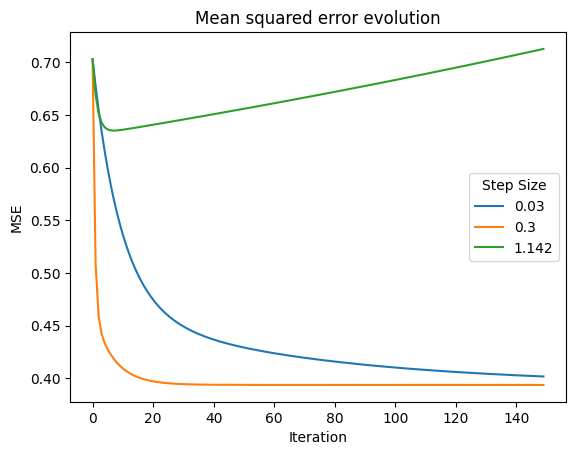

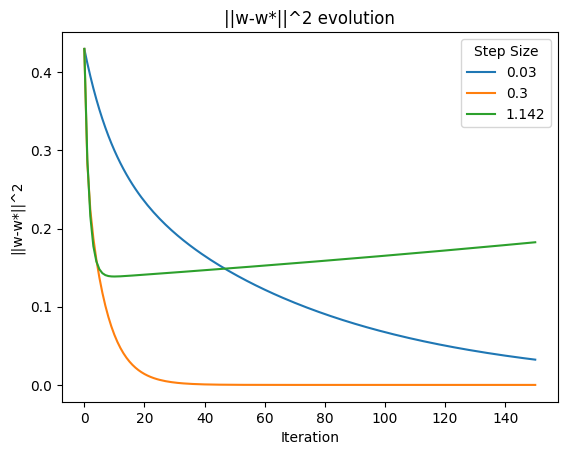

In [ ]:
w0 = torch.rand(2)-0.5
epsilons = [0.03, 0.3, 1.142]

# Train gradient descent with different values of epsilon
for epsilon in epsilons:
    w, mse_evolution, wdist_evolution = train_gradient_descent(x, y, K = 150, epsilon = epsilon, w0 = w0)

    # Assign the plots to their respective figures
    # Note: '_' on the LHS is a dummy variable that indicates we are not using the output of the function
    plt.figure(1)
    _ = plt.plot(mse_evolution, "-")

    plt.figure(2)
    _ = plt.plot(wdist_evolution, "-")

    print(f"Learning rate: {epsilon:.2f}, MSE: {mse_evolution[-1]:.3f}, ||w-w*||^2: {wdist_evolution[-1]:.3f}")

plt.figure(1)
_ = plt.title("Mean squared error evolution")
_ = plt.xlabel("Iteration")
_ = plt.ylabel("MSE")
plt.legend(epsilons, title = "Step Size")

plt.figure(2)
_ = plt.title("||w-w*||^2 evolution")
_ = plt.xlabel("Iteration")
_ = plt.ylabel("||w-w*||^2")
plt.legend(epsilons, title = "Step Size")


TASK 3

In [ ]:
def train_stochastic_gradient_descent(x, y, K = 150, epsilon = 0.1, w0 = torch.rand(2)-0.5, B = 64):
    """
    Linar MMSE with Gradient Descent.
    Inputs:
        x: torch Tensor
            Input data points

        y: torch Tensor
            Target Values

        K: int
            Max. number of iterations.

        epsilon: float
            Learning rate.

        w0: torch Tensor
            Initial parameter vector

        B: int
            Batch Size

    Output:
        w: torch Tensor
            Trained parameters

        mse_evolution: list
            Evolution of mean squared error during training.

        wdist_evolution: list
            Evolution of distance between w and the optimal, closed-form w.

    """

    # lists that store the evolution of MSE and ||w-w_star ||^2
    mse_evolution = []
    wdist_evolution = []

    # Initial w
    w = w0.clone()

    # Optimal parameter vector in closed form
    w_star = torch.linalg.inv(x.T @ x) @ x.T @ y
    wdist_evolution.append(torch.sum((w-w_star)**2))


    for k in range(K):

        # Randomly sample a batch from x and y.
        random_idxs = torch.randint(high=x.shape[0], size = (B,) )
        x_batch = x[random_idxs]
        y_batch = y[random_idxs]

        # Compute predictions
        y_pred = x_batch@w

        # Compute error
        # Mean squared error in Batch
        mse = mean_squared_error(y_batch, y_pred)

        # Total Mean squared error
        total_mse = mean_squared_error(y, x@w)
        mse_evolution.append(total_mse)

        # Compute gradients
        grad = mean_squared_error_gradient(y_batch, x_batch, w)

        # Update parameters
        w -= epsilon*grad
        wdist = torch.sum((w-w_star)**2)
        wdist_evolution.append(wdist)

    return w, mse_evolution, wdist_evolution

Learning rate: 0.03, Final MSE: 0.418
Learning rate: 0.30, Final MSE: 0.394
Learning rate: 1.10, Final MSE: 0.455


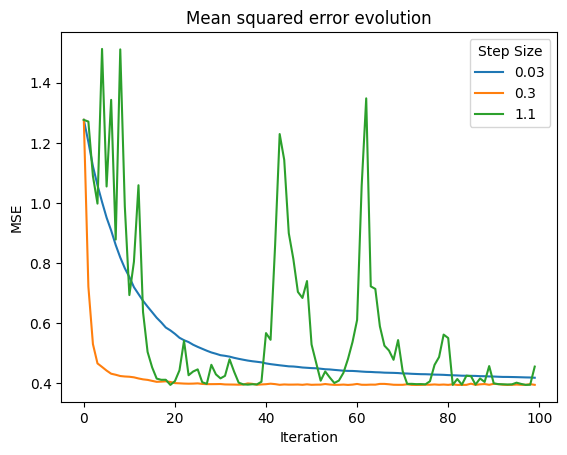

In [ ]:
# Generate a random w0 vector with elements between [-0.5, 0.5)
w0 = torch.rand(2)-0.5

# Try selecting different epsilons and observe how the MSE evolves
epsilons = [0.03, 0.3, 1.1]

for epsilon in epsilons:
    w, mse_evolution, wdist_evolution = train_stochastic_gradient_descent(x, y, K = 100, epsilon = epsilon, w0 = w0, B = 128)

    plt.figure(1)
    _ = plt.plot(mse_evolution, "-")

    print(f"Learning rate: {epsilon:.2f}, Final MSE: {mse_evolution[-1]:.3f}")

plt.figure(1)
_ = plt.title("Mean squared error evolution")
_ = plt.xlabel("Iteration")
_ = plt.ylabel("MSE")
plt.legend(epsilons, title = "Step Size")

Learning rate: 0.03, MSE: 0.407
Learning rate: 0.03, MSE: 0.404
Learning rate: 0.03, MSE: 0.403


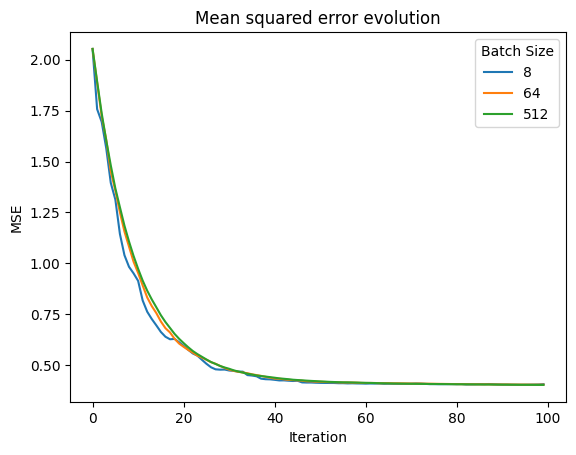

In [ ]:
w0 = torch.rand(2)-0.5
batch_sizes = [8, 64, 512]
epsilon = 0.03
for B in batch_sizes:
    w, mse_evolution, wdist_evolution = train_stochastic_gradient_descent(x, y, K = 100, epsilon = epsilon, w0 = w0, B = B)

    plt.figure(1)
    _ = plt.plot(mse_evolution, "-")

    print(f"Learning rate: {epsilon:.2f}, MSE: {mse_evolution[-1]:.3f}")

plt.figure(1)
_ = plt.title("Mean squared error evolution")
_ = plt.xlabel("Iteration")
_ = plt.ylabel("MSE")
plt.legend(batch_sizes, title = "Batch Size")

TASK 4

In [ ]:
class Parametrization(torch.nn.Module):
    def __init__(self, w_init):
        super().__init__()
        self.w = torch.nn.parameter.Parameter(w_init)
    def forward(self, x):
        return x@self.w

In [ ]:
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
epsilons = [0.03, 0.3, 0.5]
batch_sizes = [8, 64, 512]
mse_evolutions_for_e = []
K = 100

for e in epsilons:
  B = 128
  mse_evolution = []
  # Parameters
  epsilon=e
  w_init = torch.rand(2)-0.5
  # instantiate estimator
  estimator = Parametrization(w_init)
  # instantiate optimizer
  optimizer = optim.SGD(estimator.parameters(), lr=epsilon, momentum=0)
  # Data Loader
  dataset = TensorDataset(x, y)


  for i in range(K):

      random_idxs = torch.randint(high=x.shape[0], size = (B,) )
      x_batch = x[random_idxs]
      y_batch = y[random_idxs]

      # set gradients to zero
      estimator.zero_grad()
      # Compute predictions
      yHat = estimator.forward(x_batch)

      # Compute error
      mse = torch.mean((yHat-y_batch)**2)
      mse_evolution.append(mse.item())

      # Compute gradients
      mse.backward()

      # Update parameters
      optimizer.step()

  mse_evolutions_for_e.append(mse_evolution)


Learning rate: 0.03, MSE: 0.366
Learning rate: 0.30, MSE: 0.319
Learning rate: 0.50, MSE: 0.466


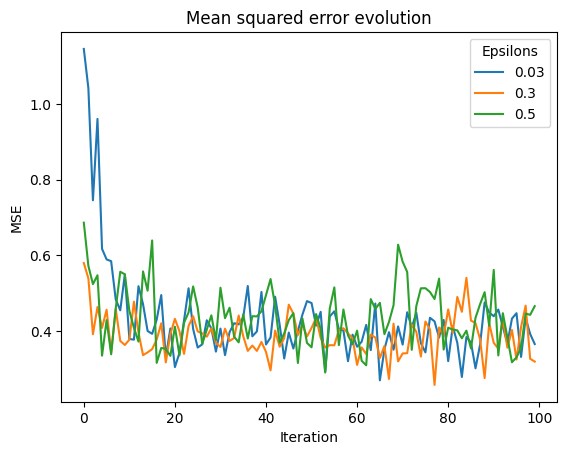

In [ ]:
for i in range(len(mse_evolutions_for_e)):
  plot = []
  for e in mse_evolutions_for_e[i]:
    plot.append(e)

  plt.figure(1)
  _ = plt.plot(plot, "-")

  print(f"Learning rate: {epsilons[i]:.2f}, MSE: {mse_evolutions_for_e[i][-1]:.3f}")

plt.figure(1)
_ = plt.title("Mean squared error evolution")
_ = plt.xlabel("Iteration")
_ = plt.ylabel("MSE")
plt.legend(epsilons, title = "Epsilons")

In [ ]:
batch_sizes = [8, 64, 512]
mse_evolutions_for_batches = []
K = 100

for b in batch_sizes:
  B = b
  mse_evolution = []
  # Parameters
  epsilon=0.03
  w_init = torch.rand(2)-0.5
  # instantiate estimator
  estimator = Parametrization(w_init)
  # instantiate optimizer
  optimizer = optim.SGD(estimator.parameters(), lr=epsilon, momentum=0)
  # Data Loader
  dataset = TensorDataset(x, y)


  for i in range(K):

      random_idxs = torch.randint(high=x.shape[0], size = (B,) )
      x_batch = x[random_idxs]
      y_batch = y[random_idxs]

      # set gradients to zero
      estimator.zero_grad()
      # Compute predictions
      yHat = estimator.forward(x_batch)

      # Compute error
      mse = torch.mean((yHat-y_batch)**2)
      mse_evolution.append(mse.item())

      # Compute gradients
      mse.backward()

      # Update parameters
      optimizer.step()

  mse_evolutions_for_batches.append(mse_evolution)


Batch Size: 8.00, MSE: 0.313
Batch Size: 64.00, MSE: 0.434
Batch Size: 512.00, MSE: 0.361


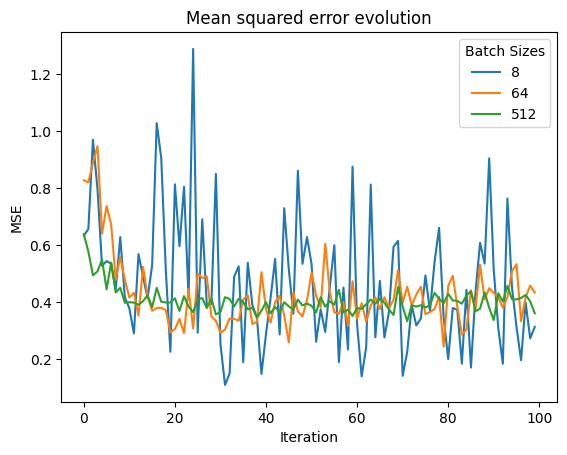

In [ ]:
for i in range(len(mse_evolutions_for_batches)):
  plot = []
  for e in mse_evolutions_for_batches[i]:
    plot.append(e)

  plt.figure(2)
  _ = plt.plot(plot, "-")

  print(f"Batch Size: {batch_sizes[i]:.2f}, MSE: {mse_evolutions_for_batches[i][-1]:.3f}")

plt.figure(2)
_ = plt.title("Mean squared error evolution")
_ = plt.xlabel("Iteration")
_ = plt.ylabel("MSE")
plt.legend(batch_sizes, title = "Batch Sizes")